In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 주요 머신러닝 모델
### 캐글에서 가장 인기있는 머신러닝 모델은 XGBoost와 LightGBM임

### 선형 회귀 모델은 선형 회귀식을 활용한 모델이다 -> 훈련데이터에 잘맞는 모델 파라미터, 즉 회귀계수를 찾는것

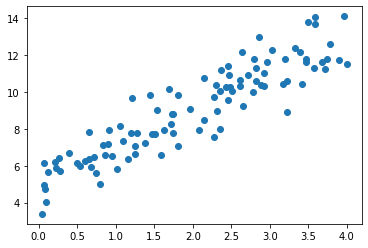

In [2]:
# 데이터 생성
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0) # 시드 값 고정

w0 = 5 # y절편
w1 = 2 # 회귀계수
noise = np.random.randn(100,1) # 노이즈

x = 4 * np.random.rand(100,1) # 0~4 사이의 실수값 100개 생성(x값)
y = w1*x +w0 + noise # y값

plt.scatter(x,y)

In [3]:
from sklearn.linear_model import LinearRegression
linear_reg_model = LinearRegression() # 선형 회귀 모델
linear_reg_model.fit(x,y) # 모델 훈련

print('기울기 :', linear_reg_model.coef_)
print('y 절편 :', linear_reg_model.intercept_)

기울기 : [[1.9808382]]
y 절편 : [5.09772262]


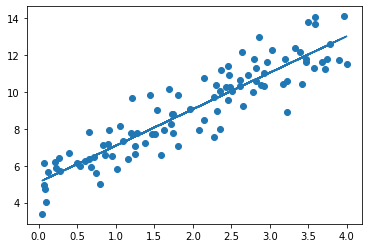

In [4]:
import matplotlib.pyplot as plt

y_predict = linear_reg_model.predict(x) # 예측

plt.scatter(x,y)
plt.plot(x, y_predict) # 선형 회귀선 그리기

# 로지스틱 회귀 모델

### 선형 회귀 방식을 응용해 분류에 적용한 모델
### 시그모이드 함수 활용하여 타깃값에 포함될 확률을 예측
### 0과 1사이의 값을 가짐 x 값(확률)이 0.5보다 작으면 음성 0.5이상이면 양성이라고 예측

# 결정 트리
### 분류와 회귀 문제에 모두 사용 가능한 모델

#### 1. 우선 데이터를 가장 잘 구분하는 조건을 정함
#### 2. 조건을 기준으로 데이터를 두 범주로 나눔
#### 3. 나뉜 각 범주에 속할 데이터를 다시 분할합니다.
#### 4. 조건에 따라 각 범주에 속한 데이터를 다시 분할합니다.
#### 5. 이런 식으로 계속 분할해 최종 결정 값을 구함

### 결정 트리에서 첫 번째 노드를 뿌리노드(root node) 조건이 담긴 중간층 노드를 중간노드(intermediate node)
### 결정 값이 담긴 마지막 노드를 말단 노드(leaf node)라고 함

## 결정 트리 분할 방식
### 결정 트리를 만들 때는 분할 조건이 중요하다. 조건에 따라 분할 후 만들어지는 트리모양(과 동작 효율)이 다르기 때문임.

## 머신러닝 에서 결정트리가 데이터를 분할하는 방식
### 노드 내 데이터의 불순도를 최소화하는 방향으로 분할한다. 
### 불순도(impurity)는 한 범주 안에 서로 다른 데이터가 얼마나 섞여있는지 나타냄

## 불순도를 측정하는 지표
### 엔트로피(entropy)

#### 엔트로피(entropy)란 불확실한 정도를 뜻함 정렬이 잘되어있을 수록 0에 가까워지고 정렬이 안되어있을 수록 1에 가까움
#### 결정트리는 정보 이득(information gain)을 최대화 하는 방향으로 노드를 분할함

### 지니 불순도
#### 엔트로피와 비슷한 개념임. 지니 불순도의 값이 클수록 불순도가 높고, 작을수록 불순도도 낮음 엔트로피와 마찬가지로 지니 불순도가 낮아지는 방향으로 노드를 분할

# 결정 트리 구현
## 분류형 모델 : DecisionTreeClassifier
## 회귀형 모델 : DecisionTreeRegressor

## DeisionTreeClassifier를 기준으로 결정 트리 구현

### criterion : 분할 시 사용할 불순도 측정 지표
#### 'gini'를 전달하면 지니 불순도를 활용해 분할
#### 'entropy'를 전달하면 정보 이득(information gain) 방법으로 분할
#### 기본값 = 'gini'

### max_depth : 트리의 최대 깊이
#### max_depthㄹ르 규정하지 않으면 모들 말단 노드의 불순도가 0이 되거나 노드의 있는 데이터 수가 min_sample_split보다 작을 때까지 트리 깊이가 깊어짐
#### 기본값 = 'None'

## min_samples_split : 노드 분할을 위한 최소 데이터 개수
#### 노드 내 데이터 개수가 이 값보다 작으면 더 이상 분할하지 않음
#### 정수형으로 전달하면 최소 데이터 개수를 의미함
#### 실수형으로 전달하면 전체 데이터 개수 중 최소 데이터 개수 비율을 의미. ex) 전체 데이터수 100, min_samples_split = 0.1 node = 100 * 01 = 10(데이터 10개가 노드 분할을 위한 최소 데이터 개수) 기본값 = 2

## min_samples_leaf : 말단 노드가 되기 위한 최소 데이터 개수
#### 분할 후 노드 내 데이터 개수가 이 값보다 작으면 더 이상 분할하지 않음
#### 정수형으로 전달하면 최소 데이터 개수를 의미
#### 실수형으로 전달하면 전체 데이터 개수 중 최소 데이터 개수 비율을 의미
#### 기본 값 = 1

## max_features : 분할에 사용할 피처 개수
#### 정수형으로 전달하면 피처 개수를 의미
#### 실수형으로 전달하면 전체 피처 개수 중 분할에 사용될 피처 개수 비율을 의미
#### 'auto'나 'sqrt'를 전달하면 sqrt(전체 피처 개수)가 분할에 사용될 피처 개수임
#### 'log2'를 전달하면 log2(전체 피처 개수)가 분할에 사용될 피처 개수임
#### None을 전달하면 전체 피처를 분할에 사용
#### 기본값 = None

### 결정 트리에 조건이 많을수록 분할이 많고 트리가 깊어짐, 분할을 지나치게 많이 하면 모델이 과대적합될 우려가 있으니 파라미터를 잘 조절해야 함.
#### max_depth, min_samples_split, min_samples_leaf가 결정트리의 과대적합을 제어하는 파라미터임

In [5]:
# 유방암 데이터셋으로 결정 트리 모델의 정확도를 측정하는 코드
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 유방암 데이터셋 불러오기
cancer_data = load_breast_cancer() # cancer_data 인스턴스 생성

X_train, X_test, y_train, y_test = train_test_split( # train, test로 데이터 분할
    cancer_data['data'],
    cancer_data['target'],
    stratify=cancer_data['target'], # y_test에 입력되는 데이터 비율 조절
    test_size=0.4,
    random_state=42) # 시드 고정

decision_tree = DecisionTreeClassifier(random_state=42) # 결정 트리 정의
decision_tree.fit(X_train, y_train) # 모델 훈련

accuracy = decision_tree.score(X_test, y_test)
print("결정 트리 점수 : {}".format(round(accuracy,3)))

결정 트리 점수 : 0.93


## 앙상블 학습

### 다양한 모델이 내린 예측 결과를 결합하는 기법을 앙상블 학습(ensumble learning)이라고 함
### 앙상블 학습을 활용하면 대체로 예측 성능이 좋아짐, 과대적합 방지 효과도 있음 // 캐글러들은 앙상블 기법을 많이 활용함

### 앙상블 학습 유형으로는 보팅, 배깅, 부스팅 등이 있음

## 보팅
#### 서로 다른 모델로 예측한 결과가 여럿 있다고 가정했을 때 개별 결과를 종합해 최종 결과를 결정하는 방식을 보팅(voting)이라고 함 // 보팅 기법은 하드, 소프트 보팅으로 나눠짐
#### 하드 보팅(hard voting)은 '다수결 투표' 방식으로 최종 예측값을 정함
#### 소프트 보팅(soft voting)은 개별 예측 확률들의 평균을 최종 예측 확률로 정하는 방식
### 일반적으로는 하드 보팅보다 소프트 보팅이 성능이 좋아 대체로 소프트 보팅을 사용

## 배깅

#### 배깅(bagging : 봉지(가방 등)에 담다)은 개별 모델로 예측한 결과를 결합해 최종 예측을 정하는 기법임
#### 배깅의 특징은 '개별 모델이 서로 다른 샘플링 데이터를 활용' 한다는 점
##### 1. 전체 훈련 데이터셋에서 무작위 샘플링한 데이터로 개별 모델을 훈련함
##### 2. 훈련된 개별 모델로 결과를 예측함
##### 3. 개별 모델의 수만큼 1~2번 작업을 반복함
##### 4. 각 모델이 예측한 값들을 보팅하여 최종 예측값을 구함
### 배깅은 원리가 간단하면서도 성능을 높일 수 있는 효과적인 기법임 // 배깅 기법을 활용한 대표적인 모델이 랜덤 포레스트임.

## 부스팅(boostiong : 복돋우다)은 가중치를 활용해 분류 성능이 약한 모델을 강하게 만드는 기법임.
#### 모델 간 협력이 이루어짐 ex) 이전 모델이 잘못 예측한 값의 가중치를 부여하여 다음 모델은 이전 모델의 잘못 예측한 데아터(가중치가 부여된 데이터)에 더 집중해 훈련함
#### 가중치가 부여된 데이터를 그만큼 더 중요하다고 판단해 더 잘 분류하려고 함 // 이런 단계를 반복하면 모델 성능이 점차 향상 됨(자세한 동작은 148p 참고)
#### 개별 분류 모델을 여러개 만들어 결합하는 방법

### 부스팅 기법을 활용한 대표적인 모델 : XGBoost, LightGBM 등이 있

# 랜덤 포레스트

### 결정 트리를 배깅 방식으로 결합한 모델임.
### 나무가 모여 숲을 이루듯 결정 트리가 모여 랜덤 포레스트를 구성함 결정 트리와 마찬가지로 랜덤 포레스트도 분류와 회귀 문제에 모두 적용 가능
### 결정 트리를 배깅 방식으로 결합해 랜덤 포레스트를 만들 수 있음(자세한 동작은 150p 참고)

## 랜덤 포레스트 구현
#### 분류 모델은 RandomForestClassifier
#### 회귀 모델은 RandomForestRegressor

## RandomForestClassifier의 파라미터
#### n_estimators : 랜덤 포레스트를 구성할 결정 트리 개수 // 기본값 100
#### criterion : 분할 시 사용할 불순도 측정 지표 // 세부 내용은 DecisionTreeClassifier와 동일
#### max_depth : 트리의 최대 깊이 // 세부 내용은 DecisionTreeClassifier와 동일
#### min_samples_split : 노드 분할을 위한 최소 데이터 개수 // 세부 내용은 DecisionTreeClassifier와 동일
#### min_samples_leaf : 말단 노드가 되기위한 최소 데이터 개수 // 세부 내용은 DecisionTreeClassifier와 동일
#### max_features : 분할에 사용할 피처 개수 // 세부 내용은 DecisionTreeClassifier와 동일 // 기본값 : 'auto'

In [6]:
# RandomForestClassifier 구현
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

# 훈련, 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(
    breast_cancer['data'],
    breast_cancer['target'],
    stratify=breast_cancer['target'],
    test_size = 0.4,
    random_state=42)

random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

random_forest.score(X_test, y_test) # 결정 트리 때보다 점수가 조금 더 올라감

0.9385964912280702

# XGBoost
### 성능이 우수한 트리 기반 부스팅 알고리즘임. // 많은 캐글 우승자가 XGBoost를 사용함
### 랜덤 포레스트는 결정 트리를 병렬로 배치하지만. XGBoost는 직렬로 배치해 사용함, 즉 랜덤 포레스트는 배깅 방식, XGBoost는 부스팅 방식임
### 부스팅 방식이므로 직전 트리가 예측한 값을 다음 트리가 활용해서 예측값을 조금씩 수정합니다.

### XGBoost의 주요 모듈은 C와 C++로 작성 되었지만 파이썬으로도 XGBoost를 사용할 수 있게 API를 제공함
### 이책에서는 파이썬 래퍼로 XGBoost를 설명함 // 별도의 데이터셋을 생성해야 됨 // DMatrix 객체를 활용해 XGBoost 전용 데이터 셋을 만들어야됨

## xgboost.DMatrix() 파라미터
#### data : xgboost.DMatrix용 데이터 셋 넘파이 배열, 판다스 DataFrame, scipy.sparse, os.PathLike, 문자열 타입을 전달 할 수 있음(os.PathLike나 문자열이면 데이터 경로를 의미)
#### label : 타깃값 // 배열 타입을 전달 할 수 있음

## XGBoost 모델은 하이퍼 파라미터가 많음 주로 사용히는 파라미터는 아래와 같음 // 이 하이퍼파라미터들은 딕셔너리 형태로 train()매서드의 params 파라미터에 전달하면 됨(XGBoost 1.4.2 기준)

### booster : 부스팅 알고리즘 // 트리 기반 모델일 때는 'gbtree', 'dart' 를 선택하고, 선형 모델일 때는 'gblinear'를 선택
#### ('gblinear'는 성능이 나빠 잘 쓰지 않음. 'dart'는 드롭 아웃을 적용한 'gbtree'라고보면 됨. 때에 따라 'dart'가 성능이 좋은 경우가 있음)
#### 기본값 = 'gbtree'

### objective : 훈련 목적 
#### 회귀 문제에서는 주로 'reg:squarederror'를 사용
#### 확률 값을 구하는 이진 분류에서는 'multi:softmax'를 사용
#### 확률 값을 구하는 다중 분류에서는 'multi:softprob'를 사용
#### 기본값 = 'reg:squarederror'

### eta(learning_rate) : 학습률(부스팅 스템을 반복하면서 모델을 업데이트 하는데 사용되는 비율)
#### 0~1 사이의 값으로 설정 할 수 있으며. 일반적으로 0.0001 ~ 0.1 사이 값을 시용 // 기본값 : 0.3

### max_depth : 개별 트리의 최대 깊이
#### 과대적합을 제어하는 파라미터
#### 트리 깊이가 깊을수록 모델이 복잡해지고 과대적합 될 우려가 있음
#### 일반적으로 3~10 사이에 값을 주로 사용
#### 값이 클수록 깊이가 한 단계만 늘어나도 메모리 사용량이 급격히 많아짐(값이 클수록 모델 훈련속도가 느려진다는 뜻) // 기본값 = 6

### subsample : 개별 트리를 훈련할 때 사용할 데이터 샘플링 비율
#### 0 ~ 1 사이 값으로 설정할 수 있음
#### 0.5로 설정하면 전체 데이터의 50%를 사용해 트리를 생성
#### 일반적으로 0.6 ~ 1사이 값을 사용. 더 작으면 샘플링 할 데이터가 너무 적기 때문
#### 기본값 = 1

### colsample_bytree : 개별 트리를 훈련할 때 사용하는 피처 샘플링 비율
#### 0~1 사이 값으로 설정할 수 있음
#### subsample과 유사한 개념. subsample은 전체 데이터에서 얼마나 샘플링할지 나타내는 비율이고, colsample_bytree는 전체 피처에서 얼마나 샘플링할지 나타내는 비율
#### 예를 들어, colsample_bytree의 값이 0.7이면, 개별 트리를 훈련할 때 총 피처의 70%만 사용해 훈련
#### 값이 작을수록 과대적합 방지 효과가 있음
#### subsample과 마찬가지로 0.6~1 사이 값을 주로 사용
#### 기본값 = 1

### alpha (reg_alpha) : L1 규제 조정 값
#### 값이 클수록 과대적합 방지 효과가 있음
#### 기본값 = 0

### lambda(reg_lambda) : L2 규제 조정 값
#### 파이썬 lambda 함수와 용어가 같아 혼동을 피하기 위해 별칭인 reg_lambda를 주로 사용
#### 값이 클수록 과대적합 방지 효과가 있음
#### 기본값 = 1

### gamma (min_split_loss) : 말단 노드가 분할하기 위한 최소 손실 감소 값
#### 0 이상 값으로 설정할 수 있음
#### 손실 감소가 gamma보다 크면 말단 노드를 분할
#### 값이 클수록 과대적합 방지 효과가 있음
#### 기본값 = 0

### min_child_weight : 과대적합 방지를 위한 값
#### 0 이상 값으로 설정할 수 있음
#### 값이 클수록 과대 적합 방지 효과가 있음
#### 기본값 = 1

### scale_pos_weight : 불균형 데이터 가중치 조정 값
#### 타깃값이 불균형 할 때 양성(positive) 값에 scale_pos_weight만큼 가중치를 줘서 균형을 맞춤(타깃값 1을 양성 값으로 간주)
#### 일반적으로 scale_pos_weight 값을(음성 타깃값 개수/ 양성 타깃값 개수)로 설정
#### 기본값 = 1

### random_state : 랜덤 시드 값(코드를 반복 실행해도 같은 결과가 나오게 지정하는 값)
#### 가본값 =  None

## 파이썬 래퍼 XGBoost는 모델 훈련을 위해 train() 매서드를 제공함(사이킷런의 .fit()메서드에 해당) xgboost.train()의 파라미터는 다음과 같음

### params : XGBoost 모델의 하이퍼 파라미터 목록
#### 딕셔너리 타입으로 전달

### dtrain : 훈련 데이터 셋
#### xgboost.DMatrix 타입으로 전달

### num_boost_round : 부스팅 반복 횟수
#### 정수형 타입으로 전달
#### num_boost_round 값이 클수록 성능이 좋아질 수 있으나 과대적합 우려가 있음
#### num_boost_round 값이 작으면 반복 횟수가 줄어들어 훈련시간이 짧아짐
#### 일반적으로 num_boost_round를 늘리면 learing_rate를 줄여야 함
#### 기본값 = 10

### evals = 모델 성능 평가용 검증 데이터셋
#### (Dmatrix, 문자열) 쌍들을 원소로 갖는 리스트 타입으로 전달. 검증 데이터셋 이름을 원하는 대로 문자열을 정하면 됨
#### 훈련을 반복하면서 훈련이 잘 되고 있는지 평가할 때 사용
#### 기본값 = 빈 배열

### feval : 검증용 평가지표
#### 사용자 정의 함수 형태로 전달
#### evals를 활용해 모델 성능을 검증 할 때 사용할 사용자 정의 평가지표 함수
#### 예측값과 실제값을 파라미터로 전달받아, 평가 지표명과 평가 점수를 반환하는 함수여야 함
#### 기본값 = None

### maximize : feval 평가점수가 높으면 좋은지 여부
#### True 또는 False 형태로 전달

### early_stopping_rounds : 조기종료 조건
#### 정수형 타입으로 전달
#### 모델은 기본적으로 num_boost_round만큼 훈련을 반복하며, 매 이터레이션마다 evals로 모델 성능을 평가하여 성능이 연속적으로 좋아지지 않는 다면 훈련을 중단하는데,
#### 훈련 중단에 필요한 최소 횟수가 early_stopping_rounds임 즉 early_stopping_rounds동안 모델 성능이 좋아지지 않는다면 훈련을 중단
#### 과대적합을 방지하는 효과가 있음
#### 조기 종료를 적용하려면 evals에 검증 데이터가 하나 이상 있어야 함 또한, evals에 검증 데이터가 여러개라면 마지막 검증 데이터를 기준으로 조기 종료 조건을 적용
#### 대체로 eta가 작으면 early_stopping_rounds를 크게 설정하고, eta가 크면 작게 설정 학습률이 작으면 그만큼 가중치가 천천히 갱신되므로 조기 종료 조건이 커야 함
#### 기본값 : None

### verbose_eval : 성능 점수 로그 설정 값
#### True/False 또는 정수형 타입으로 전달
#### True로 설정하면 매 부스팅 스텝마다 평가 점수를 출력(False면 출력하지 않음)
#### 정수면 평가점수를 매 verbose_eval 스텝마다 출력, 예컨대, verbose_eval을 100으로 설정하면 100번,200번,300번과 같이 띄엄띄엄 출력
#### 출력값이 너무 많아지는 걸 방지하려고 verbose_eval을 설정
#### 기본값 = True


## 파라미터가 매우 많지만 전부 숙지하려하지말고 기본적인 파라미터에 익숙해지면 점차 늘려가는 방식으로 학습 권장

# LightGBM
### 마이크로소프트에서 개발한 LightGBM은 XGBoost와 더불어 성능이 우수한 알고리즘임.
### XGBoost와 성능은 비슷하지만 훈련속도가 더 빨라서 많이 사용
### LightGBM 분할 방식
### 대부분 트리 기반 모델은 트리를 균형있게 분할하며 훈련함. 그래야 트리 깊이가 최소화되고, 과대적합도 방지할 수 있기 때문 하지만 균형을 유지하려면 추가 연산이 필요(시간이 더 소요됨)
### 반면, LightGBM은 말단 노드 중심으로 예측 오류를 최소화하게끔 분할함. 말단 노드 중심으로 분할 하면 균형을 유지할 필요가 없음 // 균형을 맞출 필요가 없어 추가 연산 필요 X // 따라서 균형 중심 분할에 비해 속도가 빠름
### 하지만 데이터 개수가 적을 때는 과대적합 되기 쉽다는 단점이 생겨 과대적합 방지용 하이퍼파라미터를 조정해줘야 함(모델의 구조는 157p 참고)

### LightGBM은 XGBoost와 마찬가지로 파이썬 래퍼 모듈과 사이킷런 래퍼 모듈이 있음 여기서는 파이썬 래퍼 LigthGBM으로 설명

## XGBoost와 LightGBM의 특장점
#### 1. 피처 스케일링이 따로 필요 없음 데이터의 절대적인 크기보다는 대소 관계에 영향을 받기 때문
#### 2. 레이블 인코딩을 적용해도 됨. 레이블 인코딩은 단점이 있지만, 트리 기반 모델의 특성상 분기를 거듭하면서 레이블 인코딩된 피처에서도 정보를 잘 추출할 수 있기 때문
#### 3. 결측값을 알아서 처리해줌(그럼에도 더 명확하게 하려면 결측값을 별도로 처리하는 습관을 들이는게 바람직함.)

### 반면 선형모델은 피처 스케일링, 결측값 처리, 원-핫 인코딩을 해줘야 일반적으로 성능이 좋아짐

## 파이썬 래퍼 LightGBM을 사용하려면 lightgbm.Dataset()으로 전용 데이터 셋을 만들어야 함, lightgbm.Dataset() 파라미터는 다음과 같음

### data : lightgbm.Dataset용 데이터 셋
#### 넘파이 배열, 판다스 DataFrame, scipy sparse, 문자열 등의 타입을 전달할 수 있음(문자열이면 파일 경로를 의미)

### label : 타깃값
#### 리스트, 넘파이 1차원 배열, 판다스 Series, 열이 하나인 DataFrame 타입 또는 None을 전달할 수 있음 // 기본값 = None

## 파이썬 래퍼 LightGBM 모델에서 주로 사용하는 하이퍼 파라미터들(LightGBM 3.2.1 버전 기준)
### Boostiong_type: 부스팅 알고리즘
#### 알고리즘 종류는 'gbdt','dart','goss','rf'가 있음
#### 기본값 = 'gbdt'

### objective : 훈련 목적
#### 회귀에서는 'regression', 이진 분류에선 'binary', 다중분류에선 'multiclass' 사용
#### 기본값 = 'regression'

### learning_rate(eta) : 학습률(부스팅 이터레이션을 반복하면서 모델을 업데이트하는 데 사용되는 비율)
#### XGBoost의 eta와 같은 의미

### num_leaves : 개별 트리가 가질 수 있는 최대 말단 노드 개수
#### 트리 복잡도를 결정하는 주요 파라미터
#### 값이 클수록 성능이 좋아질 수 잇으나 과대적합 우려가 있음
#### 기본값 : 31

### max_depth : 개별 트리의 최대 깊이
#### LightGBM은 말단 노드 중심으로 분할하므로 max_depth를 균형 중심 분할 모델(XGBoost)보다 크게 잡는 게 좋음
#### 과대적합 제어 파라미터
#### 트리 깊이가 깊을수록 모델이 복잡해지고 과대적합될 우려가 있음
#### 기본값 -1 (0보다 작으면 깊이에 제한이 없음)

### bagging_fraction(subsample) : 개별 트리를 훈련할 때 사용할 데이터 샘플링 비율
#### xgboost의 subsample 파라미터와 같은 의미
#### 배깅을 활성화하려면 bagging_freq 파라미터를 0이 아닌값으로 설정 해야 함

### feature_fraction(colsample_bytree) : 개별 트리를 훈련할 때 사용하는 피처 샘플링 비율
#### xgboost의 colsample_bytree 파라미터와 같은 의미

### lambda_l1(reg_alpha) : L1 규제 조정값
#### 값이 클수록 과대적합 방지 효과가 있음
#### 기본값 = 0

### lambda_l2(reg_lambda) : L2 규제 조정 값
#### 값이 클수록 과대적합 방지 효과가 있음
#### 가본값 = 0

### min_child_samples : 말단 노드가 되기 위해 필요한 최소 데이터 개수
#### 값이 클수록 과대적합 방지 효과가 있음
#### 기본값 = 20

### min_child_weight : 과대적합 방지를 위한 값
#### 0 이상 값으로 설정할 수 있음
#### 값이 클수록 과대적합 방지 효과가 있음
#### 기본값 : 1e-3

### begging_freq(subsample_freq) : 배깅 수행 빈도
#### 몇 번의 이터레이션마다 배깅을 수행할지 결정
#### 0 전달 시 배깅을 수행하지 않음
#### 1 전달 시 매 이터레이션마다 트리가 새로운 샘플링 데이터로 학습
#### 기본값 = 0

### force_row_wise : 메모리 용량이 충분하지 않을 때 메모리 효율을 높이는 파라미터
#### 메모리 용량이 충분하지 않을 때 True를 전달하면 메모리 효율이 좋아짐
#### 기본값 = False

### random_state : 랜덤 시드값
#### 기본값 = None


## 훈련 매서드인 lightgbm.train()의 파라미터
#### params : LightGBM 모델의 하이퍼파라미터 목록
#### 딕셔너리 타입으로 전달

### train_set : 훈련 데이터 셋
#### lightgbm.Dataset 타입으로 전달

### num_boost_round : 부스팅 반복 횟수
#### xgboost.train()의 num_boost_round와 같은 의미
#### 기본값 = 100

### valid_sets : 모델 성능 평가용 검증 데이터 셋
#### lightgbm.Dataset 타입으로 전달
#### 훈련을 반복하면서 훈련이 잘 되고있는지 평가할 때 사용
#### 기본값 = None

### feval : 검증용 평가지표
#### 사용자 정의 함수 형태로 전달
#### valid_sets를 활용해 모델 성능을 검증할 때 사용할 사용자 정의 평가 지표
#### 예측값과 실제값을 파라미터로 전달받아, 평가지표명, 평가점수, 평가점수가 크면 좋은지 여부를 반환하는 함수여야 함
#### 기본값 = None

### categorical_feature : 범주형 데이터 파라미터
#### 이 파라미터에 전달된 데이터를 범주형 데이터로 인식함
#### 아무 값도 전달하지 않으면 categori 타입인 데이터를 범주형 데이터로 인식함

### early_stopping_rounds : 조기종료 조건
#### 정수형 타입으로 전달
#### 모델은 기본적으로 num_boost_round만큼 훈련을 반복함
#### 매 이터레이션마다 valid_sets로 모델 성능을 평가하는데, 모델 성능이 연속으로 좋아지지 않는다면 훈련을 중단함
#### 훈련을 중단하는 데 필요한 최소 횟수가 early_stopping_rounds임 즉 early_stopping_rounds 동안 모델 성능이 좋아지지 않는다면 훈련을 중단함
#### 과대적합을 방지하는 효과가 있음
#### 대체로 learning_rate가 작으면 early_stopping_rounds를 크게 설정하고 learning_rate가 크면 early_stopping_rounds를 작게 설정함
#### 기본값 = None

### verbose_eval : 성능 점수 로그 설정 값
#### xgboost.train()의 verbose_eval과 같은 의미

## 사이킷런 래퍼 모듈 vs 파이썬 래퍼 모듈 차이점(162p 참고)

# 하이퍼파라미터 최적화

### 사용자가 직접 설정해야되는 값
### 대표적인 최적화 방법 : 그리드서치, 랜덤서치, 베이지안 최적화

## 그리드서치
#### 가장 기본적인 하이퍼파라미터 최적화 기법 // 모든 경우의 수 탐색

## 랜덤서치
#### 하이퍼파라미터를 무작위로 탐색해 가장 좋은 성능을 내는 값을 찾는 기법
#### 무작위라는 한계때문에 그리드서치나, 베이지안 최적화에 비해 사용빈도가 떨어짐

## 베이지안 최적화
#### 사전 정보를 바탕으로 최적 하이퍼파라미터 값을 확률적으로 추정하며 탐색하는 기법임 // 그리드서치나 랜덤서치보다 최적 하이퍼파라미터를 더 빠르고 효율적으로 찾아줌 // 코드도 직관적이라 사용하기 편함

## bayes_opt 패키지로 베이시안 최적화 구현
#### 1. 하이퍼파라미터 탐색 범위 설정 : 최적값을 찾고 싶은 하이퍼파라미터의 범위 설정
#### 2. 평가지표 계산 함수(성능 평가 함수) 정의 : 탐색하려는 하이퍼파라미터를 인수로 받아 평가지표 값을 계산해주는 함수를 정의함
#### 3. BayesianOptimization 객체 생성 : bayes_opt 패키지의 BayesianOptimization 객체를 생성함. 객체 생성 시 '평가지표 계산 함수'와 '하이퍼파라미터 탐색 범위'를 입력받음
#### 4. 베이지안 취적화 수행 : 3에서 생성한 BayesianOptimization 객체의 maximize() 매서드를 호출함. 
####    하이퍼파라미터 범위 내 값을 평가지표 계산 함수에 전달하면서 평가지표값을 구함 평가지표 값이 가장 좋았을때가 최적값으로 간주

### 다음과 같은 간단한 예제로 베이지안 최적화를 수행
#### 하이퍼파라미터 탐색 범위 : 'x': (-1, 5), 'y':(0,4) 평가지표 계산 함수 : -x ** 2 -(y-2)** 2 + 10 최적 하이퍼파라미터 x = 0.181, y = 2.48

#### 1) 하이퍼파라미터 탐색 범위 설정(탐색할 하이퍼파라미터는 x와 y, 범위는 딕셔너리로 지정)

In [7]:
params = {'x' : (-1, 5) , 'y' : (0,4)} # 딕셔너리 키에 하이퍼파라미터 이름을, 값에 하이퍼파라미터 범위(튜플)를 지정하면 됨 x의 범위가 (-1,5)면 -1~5사이를 탐색하겠다는 뜻임

#### 2)평가지표 계산 함수 정의 // 베이지안 최적화는 평가지표 계산 함수로 구한 평가점수를 최대화하는 방향으로 하이퍼파라미터를 탐색합니다. 평가 점수가 가장 큰 값일 때의 하이퍼파라미터를 최적 하이퍼파라미터로 간주
#### 물론 실제 최적 하이퍼파라미터는 아닐 수 있음 // 최적일 가능성이 높은 값임

#### 다음은 임의로 만들어본 평가지표 계산 함수임

In [8]:
def eval_function(x, y):
    return -x ** 2 - (y-2) ** 2 + 10

### 베이지안 최적화 객체 생성
#### BayesianOptimization()으로 베이지안 최적화 객체를 생성함 중요 파라미터로는 f와 pbound가 있음 f에 '최대화하려는 평가지표 계산 함수'를 전달하고, pbound에 하이퍼 파라미터 범위를 전달
#### 더불어 random_state를 설정해 시드값을 고정

In [9]:
from bayes_opt import BayesianOptimization

# 베이지안 최적화 객채 생성
bayesian_op = BayesianOptimization(f=eval_function,
                                   pbounds=params,
                                   random_state=0)

### 4)최적화 수행
#### 최적화는 간단히 maximize() 메서드로 수행할 수 있음. 이 메서드는 여러 파라미터를 받는데, 가장 중요한 파라미터는 init_points와 n_iter임.

### init_points : 랜덤 탐색을 수행할 스텝 횟수. 랜덤 탐색은 탐색 공간을 다양화 함으로써 최적화에 도움을 줄 수 있음

### n_iter : 베이지안 최적화를 수행할 스템 횟수. 스텝 횟수가 많을수록 최적 값을 찾을 가능성이 높음

In [10]:
# 베이지안 최적화 수행
bayesian_op.maximize(init_points=2, n_iter = 10)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        |  4.002    |  2.293    |  2.861    |
|  2        |  3.121    |  2.617    |  2.18     |
|  3        |  3.832    |  2.327    |  2.869    |
|  4        |  4.596    |  2.171    |  2.832    |
|  5        | -6.227    |  3.989    |  2.559    |
|  6        |  9.467    |  0.3522   |  1.361    |
|  7        |  7.39     | -1.0      |  3.269    |
|  8        |  5.0      | -1.0      |  0.0      |
|  9        |  3.841    |  1.469    |  0.0      |
|  10       |  8.966    | -1.0      |  1.817    |
|  11       |  9.737    |  0.1806   |  2.48     |
|  12       |  5.785    |  0.4638   |  4.0      |


#### 총 스텝 횟수(12)는 init_points(2)와 n_iter(10)을 합친 횟수임
#### 중간중간 결과가 다른색으로 출력되는데, 평가 함수 점수가 기존 최댓값을 갱신했다는 뜻임 // 따라서 다른색으로 나온 결과중 가장 마지막 스텝의 평가 점수가 전체에서 최대가 되는 값임
#### 이 결과에서는 11번째 스템으로, 베이지안 최적화로 찾은 최적의 하이퍼파라미터는 x = 0.1806 y = 2.48임 // 이 값은 베이지안 최적화 객체의 max에 저장되어있음

In [11]:
bayesian_op.max # 평가점수가 최대일 때 타깃, x, y값 출력

{'target': 9.73708754050397,
 'params': {'x': 0.18063747442587866, 'y': 2.4798776535004214}}